In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Read CSV results
df = pd.read_csv("results.csv")


In [2]:
# Read config file
with open("config.yml") as f:
     print(f.read())

experiment_name: cifar
n_repeats: 20
scenario_params_list:
 - dataset_name:
     - 'mnist'
     - 'cifar10'
   partners_count:
     - 3
   amounts_per_partner: 
     - [0.4, 0.3, 0.3]
   samples_split_option: 
     - 'random'
     - 'stratified'
   multi_partner_learning_approach:
     - 'fedavg'
     - 'seq-pure'
     - 'seq-with-final-agg'
     - 'seqavg'
   aggregation_weighting: 
     - 'uniform'
   epoch_count: 
     - 50
   minibatch_count: 
     - 10
   gradient_updates_per_pass_count:
     - 8



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 22 columns):
aggregation_weighting              160 non-null object
amounts_per_partner                160 non-null object
dataset_name                       160 non-null object
epoch_count                        160 non-null float64
final_relative_nb_samples          160 non-null object
gradient_updates_per_pass_count    160 non-null float64
is_early_stopping                  160 non-null float64
learning_computation_time_sec      160 non-null float64
minibatch_count                    160 non-null float64
mpl_nb_epochs_done                 160 non-null float64
mpl_test_score                     160 non-null float64
multi_partner_learning_approach    160 non-null object
nb_samples_used                    160 non-null float64
partners_count                     160 non-null float64
samples_split_option               160 non-null object
scenario_name                      160 non-null object
short_

In [4]:
scenario_ids = df.scenario_id.unique()
random_states = df.random_state.unique()
samples_split_options = df.samples_split_option.unique()
amounts_per_partner_list = df.amounts_per_partner.unique()
dataset_names = df.dataset_name.unique()

print('Random state', random_states)
print('Scenario id', scenario_ids)
print('amounts_per_partner', amounts_per_partner_list)
print()

df.info()
df.head(5)

Random state [0 1 2 3 4 5 6 7 8 9]
Scenario id [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
amounts_per_partner ['[0.4, 0.3, 0.3]']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 22 columns):
aggregation_weighting              160 non-null object
amounts_per_partner                160 non-null object
dataset_name                       160 non-null object
epoch_count                        160 non-null float64
final_relative_nb_samples          160 non-null object
gradient_updates_per_pass_count    160 non-null float64
is_early_stopping                  160 non-null float64
learning_computation_time_sec      160 non-null float64
minibatch_count                    160 non-null float64
mpl_nb_epochs_done                 160 non-null float64
mpl_test_score                     160 non-null float64
multi_partner_learning_approach    160 non-null object
nb_samples_used                    160 non-null float64
partners_count                    

,aggregation_weighting,amounts_per_partner,dataset_name,epoch_count,final_relative_nb_samples,gradient_updates_per_pass_count,is_early_stopping,learning_computation_time_sec,minibatch_count,mpl_nb_epochs_done,...,nb_samples_used,partners_count,samples_split_option,scenario_name,short_scenario_name,single_partner_test_mode,test_data_samples_count,train_data_samples_count,random_state,scenario_id
0,uniform,"[0.4, 0.3, 0.3]",mnist,50.0,"[0.4, 0.3, 0.3]",8.0,1.0,567.962196,10.0,12.0,...,48000.0,3.0,random,scenario_1_repeat_1_2020-06-15_11h09_c8f,"3 [0.4, 0.3, 0.3]",global,10000.0,48000.0,0,0
1,uniform,"[0.4, 0.3, 0.3]",mnist,50.0,"[0.4, 0.3, 0.3]",8.0,1.0,138.282786,10.0,7.0,...,48000.0,3.0,random,scenario_2_repeat_1_2020-06-15_11h19_6ef,"3 [0.4, 0.3, 0.3]",global,10000.0,48000.0,0,1
2,uniform,"[0.4, 0.3, 0.3]",mnist,50.0,"[0.4, 0.3, 0.3]",8.0,1.0,142.942296,10.0,7.0,...,48000.0,3.0,random,scenario_3_repeat_1_2020-06-15_11h21_ec4,"3 [0.4, 0.3, 0.3]",global,10000.0,48000.0,0,2
3,uniform,"[0.4, 0.3, 0.3]",mnist,50.0,"[0.4, 0.3, 0.3]",8.0,1.0,192.429308,10.0,7.0,...,48000.0,3.0,random,scenario_4_repeat_1_2020-06-15_11h23_02e,"3 [0.4, 0.3, 0.3]",global,10000.0,48000.0,0,3
4,uniform,"[0.4, 0.3, 0.3]",mnist,50.0,"[0.4, 0.3, 0.3]",8.0,1.0,516.250722,10.0,11.0,...,48000.0,3.0,stratified,scenario_5_repeat_1_2020-06-15_11h27_aee,"3 [0.4, 0.3, 0.3]",global,10000.0,48000.0,0,4


In [5]:
df["computation_time_minutes"] = df.learning_computation_time_sec / 60


################################################
mnist


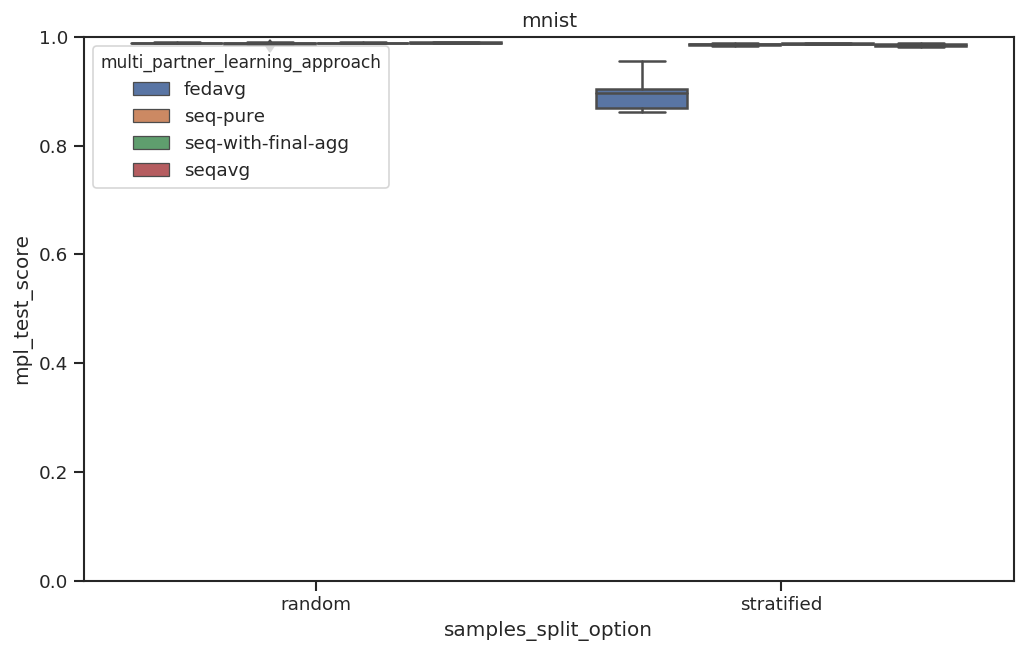

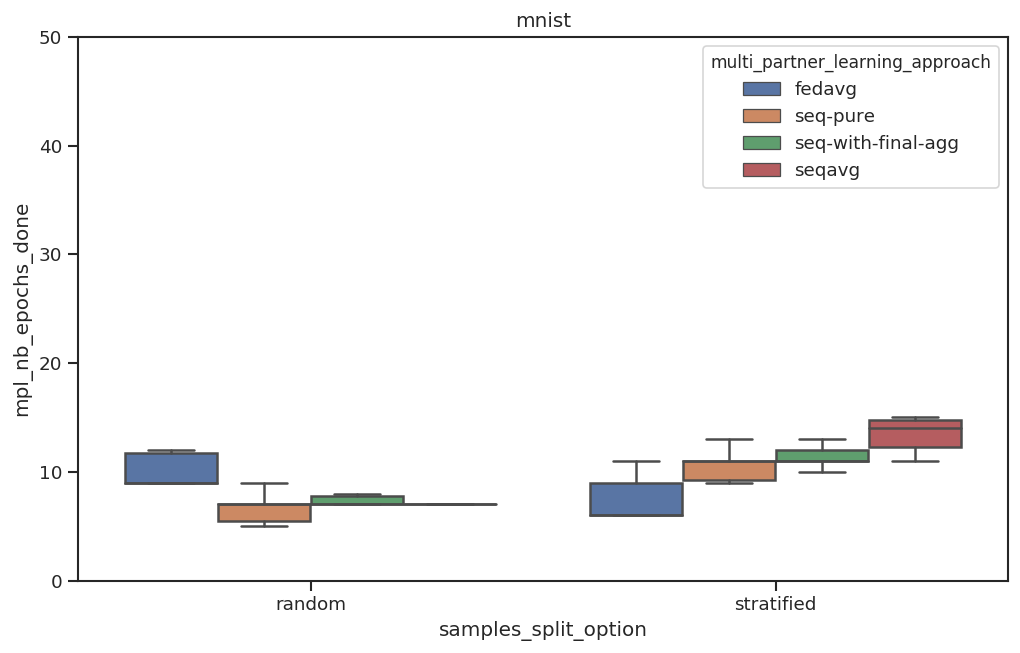

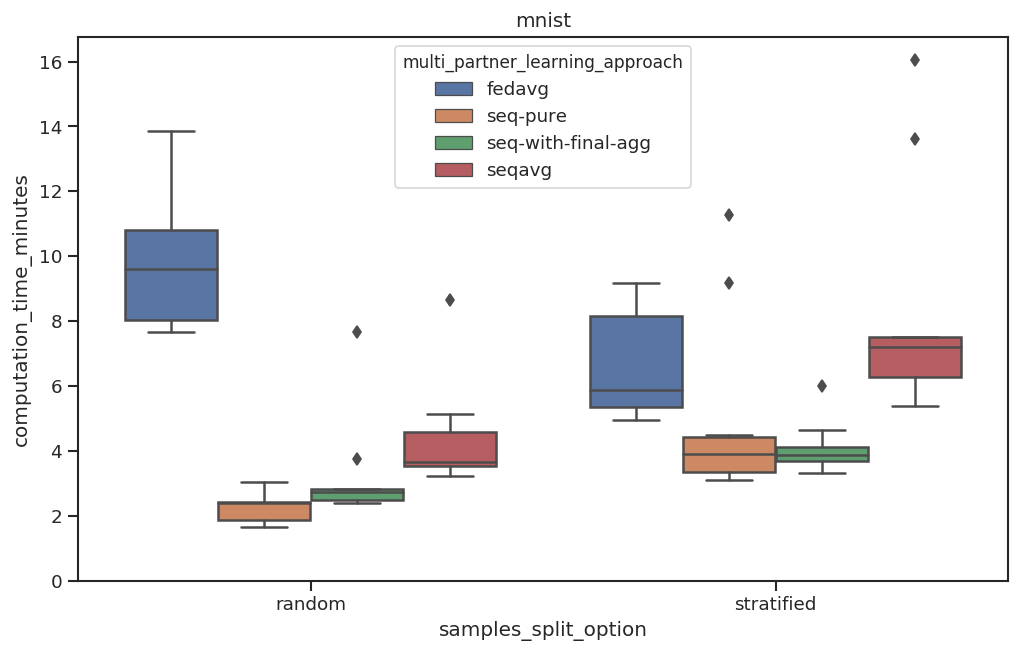

################################################
cifar10


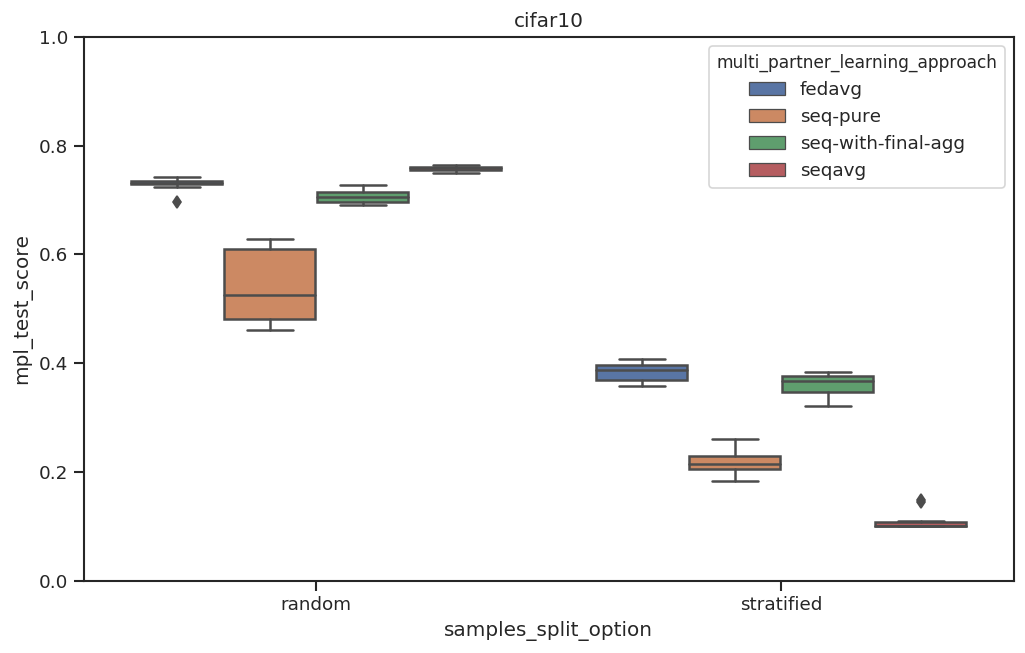

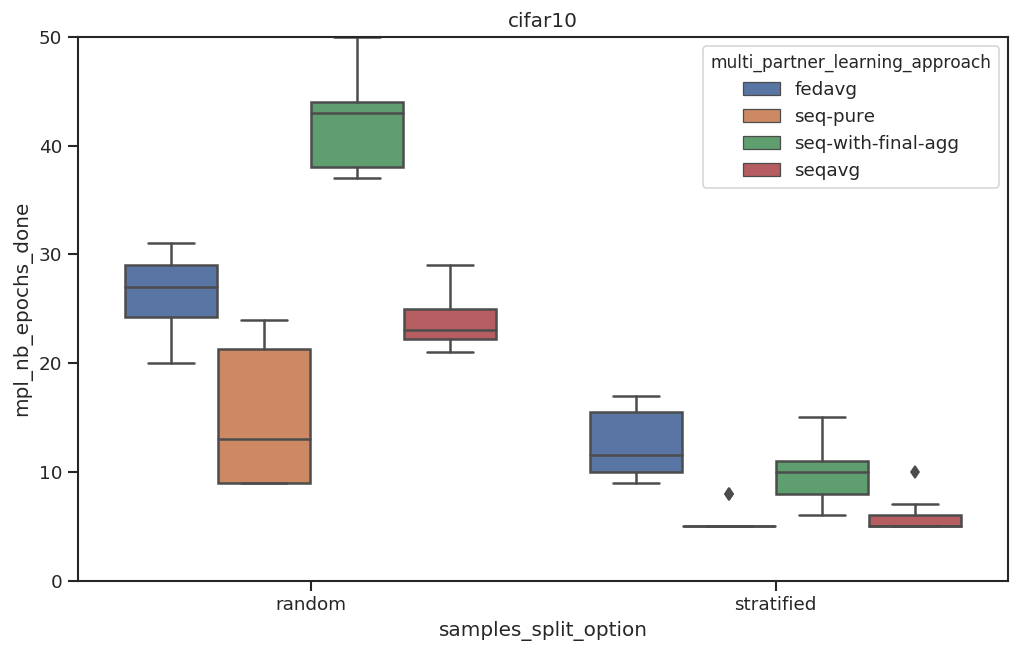

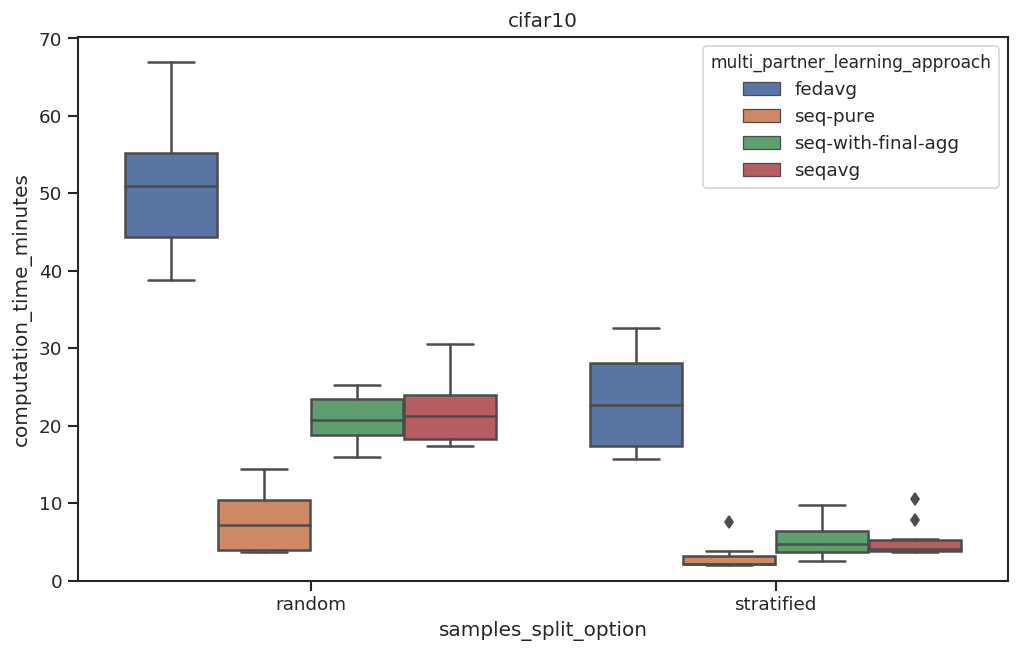

In [9]:
for dataset_name in dataset_names:

    current_df = df[(df.dataset_name == dataset_name)]
    title = dataset_name
    sns.set(style="ticks")
    #current_df.info()
    print("################################################")
    print(dataset_name)

    plt.figure(figsize=(10, 6), dpi=120)
    plt.title(title)
    ax = sns.boxplot(x="samples_split_option", y="mpl_test_score", hue="multi_partner_learning_approach",
                       data=current_df)# medianprops={'color':'yellow'})
    plt.ylim([0, 1])

    plt.figure(figsize=(10, 6), dpi=120)
    plt.title(title)
    ax = sns.boxplot(x="samples_split_option", y="mpl_nb_epochs_done", hue="multi_partner_learning_approach",
                       data=current_df)
    plt.ylim([0, 50])


    ax = plt.figure(figsize=(10, 6), dpi=120)
    plt.title(title)
    sns.boxplot(x="samples_split_option", y="computation_time_minutes", hue="multi_partner_learning_approach",
                      data=current_df)
    plt.ylim(bottom=0)


    plt.show()